## CS3570 Introduction to Multimedia Technology
### Homework 04 Due: 11:59pm, 2025/05/16

### Reminder:
* **You are not allowed to import any library in your Jupyter Notebook file except for those we provide.**
* **Your code must display and output your results to enable us to verify its correctness.**
* **Please follow the instructions in the Jupyter Notebook and complete the parts marked as `"TODO."`**
* **Please include your report in the Jupyter Notebook using markdown.**
* **Please compress your code, input images, and result images in a zip file named HW4_{StudentID}.zip and upload it to eeclass.**
* **Homework should be submitted before the announced due time. Scores of late homework will be reduced by 20% per day.**
* **If you encounter any problems or have questions, please post them on eeclass.**

## Part 1: Bezier Curve (30%)

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
# Utility functions
def draw_subplot(points , result1 , result2 , img):
    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1],  s=2, color='blue')
    plt.plot(result1[:, 0], result1[:, 1], linewidth=0.8, color='cyan')

    plt.plot(result2[:, 0], result2[:, 1], linewidth=0.8, color='magenta')
    plt.savefig('output/1a.png', dpi=200, bbox_inches='tight')
    plt.show()


def draw_plot(points , result , img):
    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1],  s=5, color='blue')
    plt.plot(result[:, 0], result[:, 1], linewidth=1, color='magenta')
    plt.savefig('output/1b.png', dpi=200, bbox_inches='tight')
    plt.show()

In [9]:
# TODO: Implement Bézier curves calculation. You may adjust the function parameters if needed.
def bezier_curve(points , step):
    def one_seg(P0, P1, P2, P3, t):
        t = t.reshape(-1,1)
        return (1-t)**3 * P0 + 3*(1-t)**2 * t * P1 + 3*(1-t) * t**2 * P2 + t**3 * P3

    m = (len(points) - 1) // 3
    curves = []
    for i in range(m):
        P0, P1, P2, P3 = points[i*3], points[i*3+1], points[i*3+2], points[i*3+3]
        segment = one_seg(P0, P1, P2, P3, step)
        # 避免重复端点
        if i > 0:
            segment = segment[1:]
        curves.append(segment)
    return np.vstack(curves)

# TODO: Scale up the image. You may adjust the function parameters if needed.
def nearest_inter(img):
    h, w = img.shape[:2]
    return cv2.resize(img, (w*4, h*4), interpolation=cv2.INTER_NEAREST)

### 1a. "Implement the cubic Bézier curve calculation

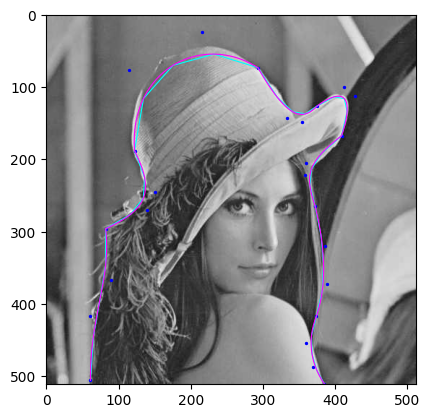

In [ ]:
img = cv2.imread("./bg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
points = np.loadtxt("./points.txt")

# TODO: You shold replace result1 , result2 with low-detail and high-detail curve results return by function bezier_curve()
t_low  = np.array([0, 0.25, 0.5, 0.75, 1.0])
t_high = np.arange(0, 1.001, 0.001)

result1 = bezier_curve(points, t_low) # low-detail curves

result2 = bezier_curve(points, t_high) # high-detail curves

if not os.path.exists('output'):
    os.makedirs('output')

draw_subplot(points  , result1 , result2 , img)

### 1b. Scale up the image and the curves by 4 times

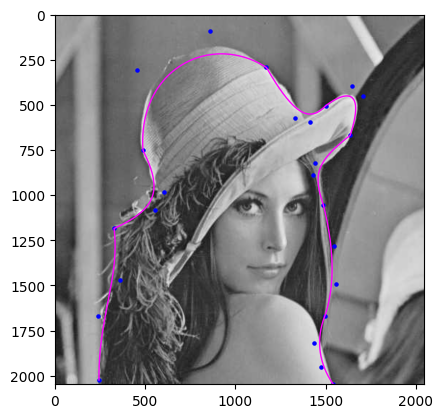

In [11]:
# TODO: Scale up the image and the bezier curve

scale_img = nearest_inter(img)

scale_points = points * 4

scale_result = bezier_curve(scale_points, t_high)

draw_plot(scale_points , scale_result , scale_img)

## Part 2. 3D Models

In [12]:
# download the packages
! pip install meshio
! pip install plotly
! pip install chart-studio
# for writing the image of plotly
! pip install kaleido
! pip install ipykernel
! pip install --upgrade nbformat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [13]:
# Import the necessaries libraries
import meshio
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly.subplots as sp

# Set notebook mode to work in offline
#py.init_notebook_mode()
#pio.renderers.default = 'iframe'
#If you can't correctly show the 3D rendering try uncommenting the above 2 lines

### Load the bunny object

In [ ]:
msh = meshio.read("bunny.obj")
verts = msh.points
x, y, z = verts.T
I, J, K =  msh.cells_dict["triangle"].T

In [16]:
colorscale = [[0, 'rgb(255,192,203)'],
              [1, 'rgb(255,192,203)']]

In [17]:
trace = go.Mesh3d(x=x, y=y, z=z,
                i=I, j=J, k=K,
                intensity=z,
                colorscale =colorscale,
                showscale=False)

py.iplot([trace])

Output hidden; open in https://colab.research.google.com to view.

### 2a. Shift the center of the bunny to (0, 0, 0)

In [18]:
# TODO: Implement the translation

x_center_val = (x.min() + x.max()) / 2
y_center_val = (y.min() + y.max()) / 2
z_center_val = (z.min() + z.max()) / 2

x_center = x - x_center_val
y_center = y - y_center_val
z_center = z - z_center_val

trace = go.Mesh3d(x=x_center, y=y_center, z=z_center,
                i=I, j=J, k=K,
                intensity=z,
                colorscale =colorscale,
                showscale=False)
py.iplot([trace])

fig = go.Figure([trace])
fig.add_trace(trace)
fig.write_image("output/2a.png", scale=2)

Output hidden; open in https://colab.research.google.com to view.

### 2b. Rotate the bunny to face the screen

In [19]:
# TODO: Implement the rotation
theta = np.pi
cos_t, sin_t = np.cos(theta), np.sin(theta)
x_rotate, y_rotate, z_rotate = x_center * cos_t + z_center * sin_t, y_center, -x_center * sin_t + z_center * cos_t

trace = go.Mesh3d(x=x_rotate, y=y_rotate, z=z_rotate,
                i=I, j=J, k=K,
                intensity=z,
                colorscale=colorscale,
                showscale=False)
py.iplot([trace])

fig = go.Figure([trace])
fig.write_image("output/2b.png", scale=2)

Output hidden; open in https://colab.research.google.com to view.

### 2c. 3D Lighting



### Create a spherical surface and map a moon texture onto it

In [ ]:
import plotly.graph_objects as go

# Create a sphere surface with moon texture, we've already finished this part for you.
# grid resolution
n_phi, n_theta = 180, 360

# build sphere coords
theta, phi = np.meshgrid(
    np.linspace(0, 2*np.pi, n_theta),
    np.linspace(0, np.pi,   n_phi),
)
x = np.sin(phi)*np.cos(theta)
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)

# load + resize grayscale map
img = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (n_theta, n_phi))
surfacecolor = img.astype(float) / 255.0
# move the zero‐longitude seam to the back
surfacecolor = np.roll(surfacecolor, n_theta//2, axis=1)

# plot
common_lightpos = dict(x=100, y=200, z=0)
fig = go.Figure(go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lightposition=common_lightpos,
    showscale=False
))
fig.update_layout(
    scene=dict(aspectmode="data"),
    margin=dict(l=0, r=0, t=0, b=0)
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Try different lighting settings

In [21]:
from plotly.subplots import make_subplots

# TODO: Compare different ambient, diffuse and specular lighting settings.
#       reference: https://plotly.com/python/v3/3d-surface-lighting/
#2c_1. Ambient light
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

trace1 = (go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lighting=dict(ambient=0.3, diffuse=0.3, specular=0.05, roughness=0.5),
    lightposition=common_lightpos,
    showscale=False
))
trace2 = (go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lighting=dict(ambient=0.8, diffuse=0.3, specular=0.05, roughness=0.5),
    lightposition=common_lightpos,
    showscale=False
))


fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=1,col=2)

fig.write_image("output/2c_1.png", scale=2)
fig.show()

# 2c_2. Diffuse light
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

trace1 = (go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lighting=dict(ambient=0.3,diffuse=0.4,specular=0.05,roughness=0.5),
    lightposition=common_lightpos,
    showscale=False
))
trace2 = (go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lighting=dict(ambient=0.3,diffuse=0.95,specular=0.05,roughness=0.5),
    lightposition=common_lightpos,
    showscale=False
))

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=1,col=2)

fig.write_image("output/2c_2.png", scale=2)
fig.show()

# 2c_3. Specular light
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

trace1 = (go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lighting=dict(ambient=0.3,diffuse=0.8,specular=0.3,roughness=0.5),
    lightposition=common_lightpos,
    showscale=False
))
trace2 = (go.Surface(
    x=x, y=y, z=z,
    surfacecolor=surfacecolor,
    colorscale="gray",
    lighting=dict(ambient=0.3,diffuse=0.8,specular=0.5,roughness=0.5),
    lightposition=common_lightpos,
    showscale=False
))

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=1,col=2)

fig.write_image("output/2c_3.png", scale=2)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Part 3. Report

**1. Bézier Curves**  
- We implemented cubic Bézier curves using the Bernstein‐polynomial form:  
  $B(t) = (1-t)^3 P_0 \;+\; 3(1-t)^2 t\,P_1 \;+\; 3(1-t)t^2\,P_2 \;+\; t^3 P_3.$  
- Each segment (4 control points) is sampled at:  
  - **Low detail**: $t = [0,0.25,0.5,0.75,1.0]$ (5 points), resulting in a faceted appearance.  
  - **High detail**: $t = \mathrm{np.arange}(0,1.001,0.001)$ (1001 points), producing a smooth curve.  
- To avoid duplicating points at segment boundaries, we omit the first sample of each subsequent segment.  
- For scaling, we multiplied both the background image and control‐point coordinates by 4, used nearest-neighbor interpolation to enlarge the image, and re-plotted the high-detail curve to verify that the shape remains consistent.

**2. 3D Models**  
- **2(a) Centering**:  
  - Loaded the OBJ file’s vertices $(x,y,z)$, computed each axis’s midpoint $(\min+\max)/2$, and subtracted it from all vertices so the model is centered at the origin.  
- **2(b) Rotation**:  
  - Constructed a rotation of $\pi$ radians about the world Y-axis using  
    $
      x' = x\cos\pi + z\sin\pi,\quad
      y' = y,\quad
      z' = -x\sin\pi + z\cos\pi,
    $  
  - Applied this to the centered vertices so the bunny faces the camera.  
- **2(c) Lighting Comparisons**:  
  - Rendered a textured sphere (“moon”) with Plotly’s `Surface` trace and compared three parameter sets:  
    1. **Ambient**: increased from 0.3 to 0.8, which raised the overall base brightness and softened shadows.  
    2. **Diffuse**: increased from 0.4 to 0.95, which made shading transitions sharper and more pronounced.  
    3. **Specular**: increased from 0.3 to 0.5, which intensified the highlights and gave the surface a glossier appearance.  
  - These comparisons vividly illustrate how ambient controls global illumination, diffuse controls shadow depth and transition, and specular controls highlight intensity.
